Bias

Simulation of population and sampling

Calculate mean (unbiased estimator) and range (biased)

Bootstrap

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# generate population - normal distribution

population = np.random.normal(100,10,size = (2000000,))
population_mean = np.mean(population)
population_std = np.std(population)


plt.hist(population, bins = 1000)
plt.title('Population. Norm(100,10)') 
plt.xlabel('Value') 
plt.ylabel('Count') 
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

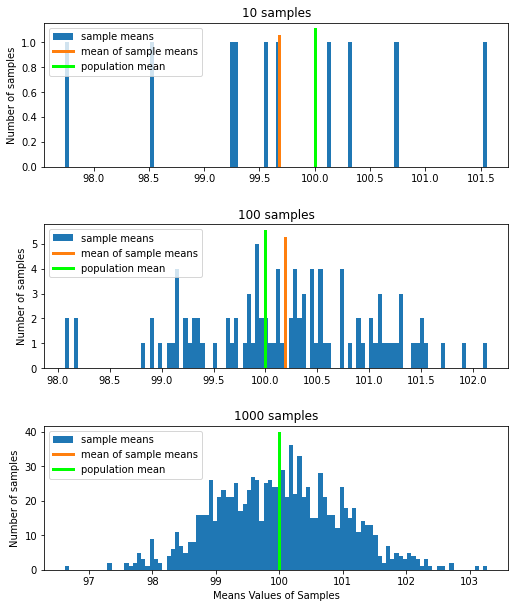

In [ ]:
# sample 10, 100, 1000 samples of 100
# show mean

samples10 = np.random.choice(population, size = (100,10)) 
samples100 = np.random.choice(population, size = (100,100)) 
samples1000 = np.random.choice(population, size = (100,1000)) 

sample_means_all = [samples10.mean(axis = 0), 
                    samples100.mean(axis = 0), 
                    samples1000.mean(axis = 0)]

fig, ax = plt.subplots(3,1)

for n in range(3):
  sample_means = sample_means_all[n]
  sample_mean_mean = sample_means.mean()
  ax[n].hist(sample_means, bins = 100, label = 'sample means')
  ax[n].plot( [sample_mean_mean, sample_mean_mean], ax[n].get_ylim(), lw = 3, label = 'mean of sample means')
  ax[n].plot( [population_mean, population_mean], ax[n].get_ylim(), lw = 3, color = 'lime', label = 'population mean')
  ax[n].set_title(str(len(sample_means)) + ' samples')
  ax[n].set_ylabel('Number of samples')
  ax[n].legend(loc = 'upper left')

ax[2].set_xlabel('Means Values of Samples')

fig.subplots_adjust(bottom=-1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

#plt.savefig("Sample_3means.png", bbox_inches='tight')
#files.download("Sample_3means.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

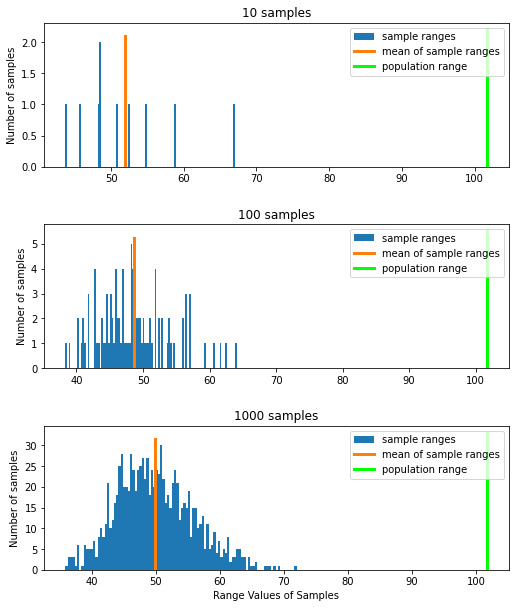

In [ ]:
# show range
sample_range_all = [samples10.ptp(axis = 0), 
                    samples100.ptp(axis = 0), 
                    samples1000.ptp(axis = 0)]
population_range = population.ptp()

fig, ax = plt.subplots(3,1)

for n in range(3):
  sample_ranges = sample_range_all[n]
  sample_ranges_mean = sample_ranges.mean()
  ax[n].hist(sample_ranges, bins = 100, label = 'sample ranges')
  ax[n].plot( [sample_ranges_mean, sample_ranges_mean], ax[n].get_ylim(), lw = 3, label = 'mean of sample ranges')
  ax[n].plot( [population_range, population_range], ax[n].get_ylim(), lw = 3, color = 'lime', label = 'population range')
  ax[n].set_title(str(len(sample_ranges)) + ' samples')
  ax[n].set_ylabel('Number of samples')
  ax[n].legend(loc = 'upper right')
ax[2].set_xlabel('Range Values of Samples')

fig.subplots_adjust(bottom=-1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

#plt.savefig("Sample_3ranges.png", bbox_inches='tight')
#files.download("Sample_3ranges.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

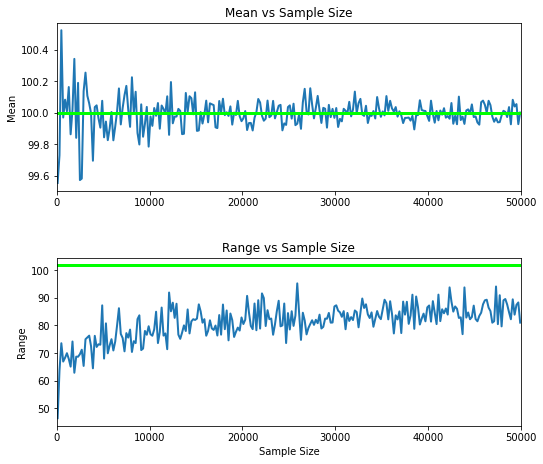

In [ ]:
# mean and range with different sample size

sample_sizes = np.arange(100, 50000, 200)
samples_means = np.zeros(len(sample_sizes),)
samples_ranges = np.zeros(len(sample_sizes),)

for n in range(len(sample_sizes)):
  samples = np.random.choice(population, size = (sample_sizes[n])) 
  samples_means[n] = samples.mean()
  samples_ranges[n] = samples.ptp()

fig, ax = plt.subplots(2,1)
ax[0].plot(sample_sizes, samples_means, lw = 2)
ax[1].plot(sample_sizes, samples_ranges, lw = 2)
ax[0].plot(ax[0].get_xlim(), [population_mean, population_mean], color = 'lime', lw = 3)
ax[1].plot(ax[1].get_xlim(), [population_range, population_range], color = 'lime', lw = 3)
ax[0].set_xlim((0,50000))
ax[1].set_xlim((0,50000))
ax[1].set_xlabel('Sample Size')
ax[0].set_ylabel('Mean')
ax[1].set_ylabel('Range')
ax[0].set_title('Mean vs Sample Size')
ax[1].set_title('Range vs Sample Size')

fig.subplots_adjust(bottom=-0.5, right=1.2, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

#plt.savefig("Sample_size.png", bbox_inches='tight')
#files.download("Sample_size.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

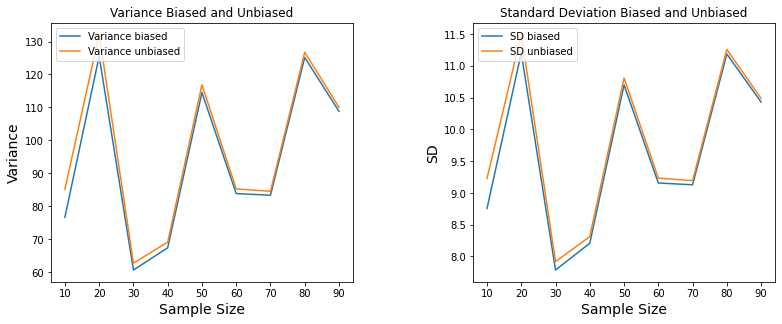

In [ ]:
# different sample sizes - var and sd biased and unbiased

sample_sizes = np.arange(10,100,10)
samples_sds1 = np.zeros(len(sample_sizes),)
samples_sds2 = np.zeros(len(sample_sizes),)
samples_vars1 = np.zeros(len(sample_sizes),)
samples_vars2 = np.zeros(len(sample_sizes),)

for n in range(len(sample_sizes)):
  samples = np.random.choice(population, size = (sample_sizes[n])) 
  samples_sds1[n], samples_vars1[n] = samples.std(), samples.var()
  samples_sds2[n], samples_vars2[n] = samples.std(ddof = 1), samples.var(ddof = 1)

fig, ax = plt.subplots(1,2)

ax[0].plot(sample_sizes, samples_vars1, label = 'Variance biased')
ax[0].plot(sample_sizes, samples_vars2, label = 'Variance unbiased')
ax[0].set_xlabel('Sample Size', fontsize = 14), ax[0].set_ylabel('Variance', fontsize = 14)
ax[0].set_title('Variance Biased and Unbiased')
ax[0].legend(loc = 'upper left')

ax[1].plot(sample_sizes, samples_sds1, label = 'SD biased')
ax[1].plot(sample_sizes, samples_sds2, label = 'SD unbiased')
ax[1].set_xlabel('Sample Size', fontsize = 14), ax[1].set_ylabel('SD', fontsize = 14)
ax[1].set_title('Standard Deviation Biased and Unbiased')
ax[1].legend(loc = 'upper left')
fig.subplots_adjust(bottom=0, right=1.8, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

#plt.savefig("Var_SD_biased_unbiased.png", bbox_inches='tight')
#files.download("Var_SD_biased_unbiased.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

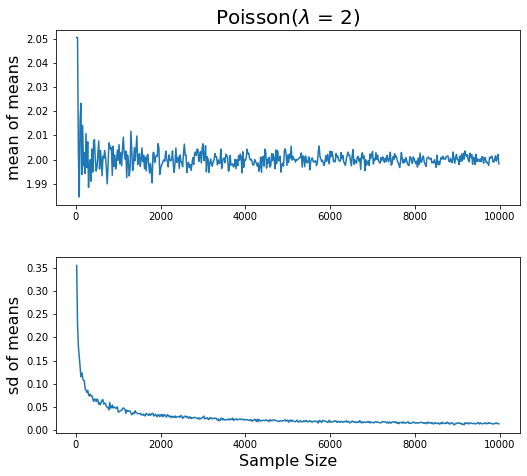

In [ ]:
# different sample size - mean
sample_sizes = np.arange(20, 10000, 20)
samples_means_mean = np.zeros(len(sample_sizes),)
samples_means_sd = np.zeros(len(sample_sizes),)

for n in range(len(sample_sizes)):
  samples = np.random.poisson(2, size = (sample_sizes[n],100)) 
  samples_means = samples.mean(axis=0)
  samples_means_mean[n], samples_means_sd[n] = samples_means.mean(), samples_means.std()


fig, ax = plt.subplots(2,1)
ax[0].plot(sample_sizes, samples_means_mean)
ax[1].plot(sample_sizes, samples_means_sd)
ax[1].set_xlabel('Sample Size', fontsize = 16)
ax[0].set_ylabel('mean of means', fontsize = 16)
ax[1].set_ylabel('sd of means', fontsize = 16)
ax[0].set_title('Poisson($\lambda$ = 2)', fontsize = 20)

fig.subplots_adjust(bottom=-0.5, right=1.2, top=0.9, wspace=0.4, hspace=0.3)

plt.show()
#plt.savefig("Mean_diff_sample_size.png", bbox_inches='tight')
#files.download("Mean_diff_sample_size.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

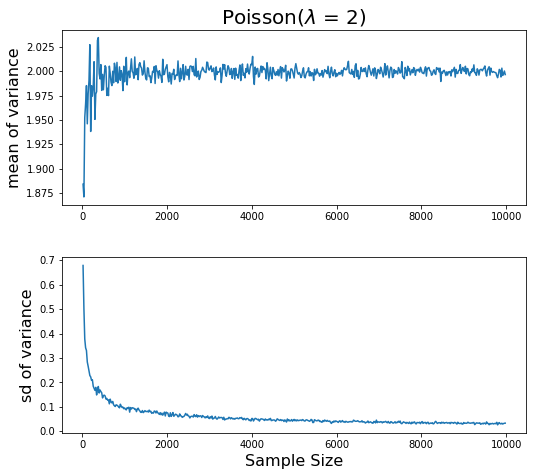

In [ ]:
# different sample size - variance

sample_sizes = np.arange(20, 10000, 20)
samples_var_mean = np.zeros(len(sample_sizes),)
samples_var_sd = np.zeros(len(sample_sizes),)

for n in range(len(sample_sizes)):
  samples = np.random.poisson(2, size = (sample_sizes[n],100)) 
  samples_var = samples.var(axis=0)
  samples_var_mean[n], samples_var_sd[n] = samples_var.mean(), samples_var.std(ddof=1)


fig, ax = plt.subplots(2,1)
ax[0].plot(sample_sizes, samples_var_mean)
ax[1].plot(sample_sizes, samples_var_sd)
ax[1].set_xlabel('Sample Size', fontsize = 16)
ax[0].set_ylabel('mean of variance', fontsize = 16)
ax[1].set_ylabel('sd of variance', fontsize = 16)
ax[0].set_title('Poisson($\lambda$ = 2)', fontsize = 20)

fig.subplots_adjust(bottom=-0.5, right=1.2, top=0.9, wspace=0.4, hspace=0.3)

plt.show()
#plt.savefig("Var_diff_sample_size.png", bbox_inches='tight')
#files.download("Var_diff_sample_size.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

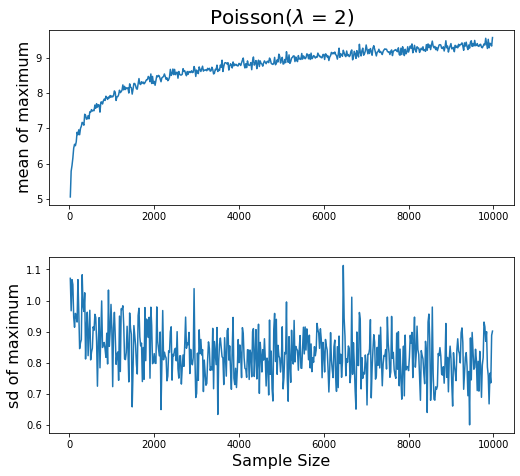

In [ ]:
# different sample size - maximum
sample_sizes = np.arange(20, 10000, 20)
samples_max_mean = np.zeros(len(sample_sizes),)
samples_max_sd = np.zeros(len(sample_sizes),)

for n in range(len(sample_sizes)):
  samples = np.random.poisson(2, size = (sample_sizes[n],100)) 
  samples_max = samples.max(axis=0)
  samples_max_mean[n], samples_max_sd[n] = samples_max.mean(), samples_max.std(ddof=1)

fig, ax = plt.subplots(2,1)
ax[0].plot(sample_sizes, samples_max_mean)
ax[1].plot(sample_sizes, samples_max_sd)
ax[1].set_xlabel('Sample Size', fontsize = 16)
ax[0].set_ylabel('mean of maximum', fontsize = 16)
ax[1].set_ylabel('sd of maximum', fontsize = 16)
ax[0].set_title('Poisson($\lambda$ = 2)', fontsize = 20)

fig.subplots_adjust(bottom=-0.5, right=1.2, top=0.9, wspace=0.4, hspace=0.3)

plt.show()
#plt.savefig("Max_diff_sample_size.png", bbox_inches='tight')
#files.download("Max_diff_sample_size.png")

In [ ]:
# bootstrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/numSpikes.csv'

data = pd.read_csv(url)

print(data)


     numSpikes
0            1
1            1
2            0
3            3
4            1
..         ...
115          1
116          2
117          3
118          7
119          0

[120 rows x 1 columns]


In [ ]:
# plot original data, calculate mean 
spikes_data = data.numSpikes
data_len = len(spikes_data)
data_mean = data.mean()

plt.hist(spikes_data, bins = 50)
plt.plot([data_mean, data_mean] , plt.gca().get_ylim(), color = 'lime', lw = 3)
plt.xlabel('Number of spikes per second')
plt.ylabel('Number of secondsout of 200')
plt.title('Neuron Activity')
plt.show()
#plt.savefig("spikes_hist.png", bbox_inches='tight')
#files.download("spikes_hist.png")

numSpikes    3.008333
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

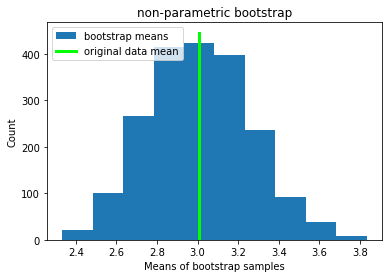

In [ ]:
# non-parametric bootstrap
num_boot = 2000
boot_data = np.random.choice(spikes_data, size = (data_len,num_boot) ) # with repetitions
boot_mean = boot_data.mean(axis = 0)

plt.hist(boot_mean, label = 'bootstrap means')
plt.plot([data_mean,data_mean], plt.gca().get_ylim(), color = 'lime', lw = 3, label = 'original data mean')
plt.xlabel('Means of bootstrap samples')
plt.ylabel('Count')
plt.title('non-parametric bootstrap')
plt.legend(loc = 'upper left')
plt.show()
#plt.savefig("spikes_nonparam_boot.png", bbox_inches='tight')
#files.download("spikes_nonparam_boot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

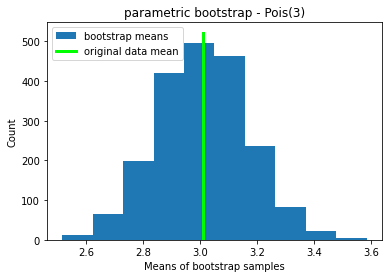

In [ ]:
# parametric bootstrap
num_boot = 2000
boot_data = np.random.poisson(data_mean, size = (data_len,num_boot) )
boot_mean = boot_data.mean(axis = 0)

plt.hist(boot_mean, label = 'bootstrap means')
plt.plot([data_mean,data_mean], plt.gca().get_ylim(), color = 'lime', lw = 3, label = 'original data mean')
plt.xlabel('Means of bootstrap samples')
plt.ylabel('Count')
plt.title('parametric bootstrap - Pois(3)')
plt.legend(loc = 'upper left')
plt.show()
#plt.savefig("spikes_param_boot.png", bbox_inches='tight')
#files.download("spikes_param_boot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

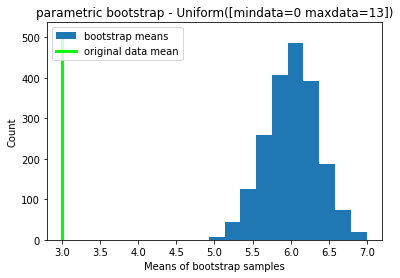

In [ ]:
# wrong distribution (uniform descrete)

num_boot = 2000
boot_data = np.random.randint(spikes_data.min(), spikes_data.max(), size = (data_len,num_boot) )
boot_mean = boot_data.mean(axis = 0)

plt.hist(boot_mean, label = 'bootstrap means')
plt.plot([data_mean,data_mean], plt.gca().get_ylim(), color = 'lime', lw = 3, label = 'original data mean')
plt.xlabel('Means of bootstrap samples')
plt.ylabel('Count')
plt.title('parametric bootstrap - Uniform([mindata=0 maxdata=13])')
plt.legend(loc = 'upper left')
plt.show()
#plt.savefig("spikes_wrong_param_boot.png", bbox_inches='tight')
#files.download("spikes_wrong_param_boot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

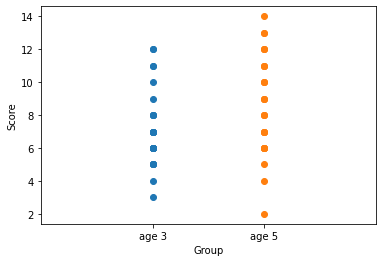

In [ ]:
# bootstrap unpaired (unmatched pairs)

comprehension = [[5,6,8,12,11,9,7,6,8,7,8,12,5,6,7,8,11,7,7,5,3,4,10,6,6,5,7,6,5,6],
                 [6,7,9,13,12,10,11,8,10,9,8,13,6,14,6,11,12,10,9,4,5,12,11,2,7,8,7,6,6,7]]

group1 = np.array(comprehension[0])
group2 = np.array(comprehension[1])

mean_group1 = group1.mean()
mean_group2 = group2.mean()
mean_diff = mean_group2-mean_group1

plt.scatter(np.ones(len(group1),),group1)
plt.scatter(np.full((len(group2),),2),group2)
plt.xlim((0,3)) , plt.xlabel('Group') , plt.ylabel('Score')
plt.xticks([1,2], ['age 3' , 'age 5'])
plt.show()
#plt.savefig("two_groups_unmatched.png", bbox_inches='tight')
#files.download("two_groups_unmatched.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

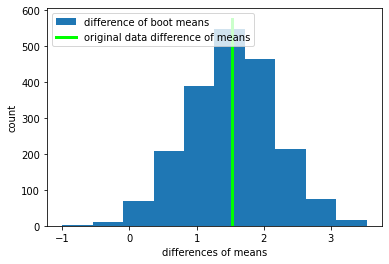

In [ ]:
# bootstrap unpaired

num_boot = 2000

boot_group1 = np.random.choice(group1,size = (len(group1),num_boot))
boot_group2 = np.random.choice(group2,size = (len(group1),num_boot))

boot_mean1 = boot_group1.mean(axis = 0)
boot_mean2 = boot_group2.mean(axis = 0)

boot_diff_means = boot_mean2-boot_mean1

plt.hist(boot_diff_means, label = 'difference of boot means')
plt.plot([mean_diff, mean_diff], plt.gca().get_ylim(), color = 'lime', lw = 3, 
         label = 'original data difference of means')
plt.xlabel('differences of means') , plt.ylabel('count')
plt.legend(loc = 'upper left')
#plt.show()
plt.savefig("boot_unmatched.png", bbox_inches='tight')
files.download("boot_unmatched.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

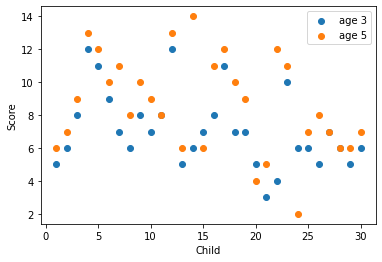

In [ ]:
# bootstrap paired (matched pairs)

plt.scatter(np.arange(1,len(group1)+1,1),group1, label = 'age 3')
plt.scatter(np.arange(1,len(group2)+1,1),group2, label = 'age 5')
plt.xlabel('Child') , plt.ylabel('Score'), plt.legend()
#plt.show()
plt.savefig("two_groups_matched.png", bbox_inches='tight')
files.download("two_groups_matched.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

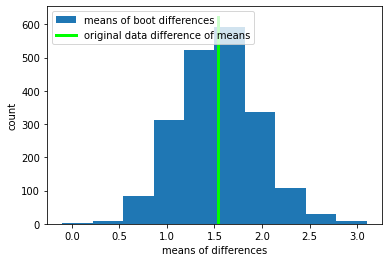

In [ ]:
# bootstrap paired

data_diff = group2-group1

boot_diff = np.random.choice(data_diff, size = (len(group1),num_boot))

boot_mean_diff = boot_diff.mean(axis = 0)

plt.hist(boot_mean_diff,  label = 'means of boot differences')
plt.plot([mean_diff, mean_diff], plt.gca().get_ylim(), color = 'lime', lw = 3, 
         label = 'original data difference of means')
plt.xlabel('means of differences') , plt.ylabel('count')
plt.legend(loc = 'upper left')
plt.show()
#plt.savefig("boot_matched.png", bbox_inches='tight')
#files.download("boot_matched.png")

Visualisation

In [ ]:
# load data file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io


In [ ]:

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/AudioVisual.csv'
data = pd.read_csv(url)

print(data) # or data.head()

    Meas Subject  ResponseTime  Stimulus        Group
0      1      s1        226.27  auditory  NonMusician
1      2      s2        187.52  auditory  NonMusician
2      3      s3        279.77  auditory  NonMusician
3      4      s4        233.83  auditory  NonMusician
4      5      s5        180.83  auditory  NonMusician
..   ...     ...           ...       ...          ...
67    68     s32        239.00    visual     Musician
68    69     s33        194.93    visual     Musician
69    70     s34        224.60    visual     Musician
70    71     s35        240.93    visual     Musician
71    72     s36        234.95    visual     Musician

[72 rows x 5 columns]


In [ ]:
# explore data

for col in data.columns:
    print(col)

print(np.unique(data.Subject))
print(len(np.unique(data.Subject)))

print(np.unique(data.Stimulus))
print('number auditory = ' + str(sum(data.Stimulus == np.unique(data.Stimulus)[0])))
print('number visual = ' + str(sum(data.Stimulus == np.unique(data.Stimulus)[1])))

print(np.unique(data.Group))
print('number Musician = ' + str(sum(data.Group == np.unique(data.Group)[0])))
print('number NonMusician = ' + str(sum(data.Group == np.unique(data.Group)[1])))

group_lens = [sum(data.Group[data.Stimulus==np.unique(data.Stimulus)[0]] == np.unique(data.Group)[0]), 
              sum(data.Group[data.Stimulus==np.unique(data.Stimulus)[1]] == np.unique(data.Group)[0]),
              sum(data.Group[data.Stimulus==np.unique(data.Stimulus)[0]] == np.unique(data.Group)[1]), 
              sum(data.Group[data.Stimulus==np.unique(data.Stimulus)[1]] == np.unique(data.Group)[1])]

print('number Musician auditory = ' + str(group_lens[0]))
print('number Musician visual = ' + str(group_lens[1]))

print('number NonMusician auditory = ' + str(group_lens[2]))
print('number NonMusician visual = ' + str(group_lens[3]))



Meas
Subject
ResponseTime
Stimulus
Group
['s1' 's10' 's11' 's12' 's13' 's14' 's15' 's16' 's17' 's18' 's19' 's2'
 's20' 's21' 's22' 's23' 's24' 's25' 's26' 's27' 's28' 's29' 's3' 's30'
 's31' 's32' 's33' 's34' 's35' 's36' 's4' 's5' 's6' 's7' 's8' 's9']
36
['auditory' 'visual']
number auditory = 36
number visual = 36
['Musician' 'NonMusician']
number Musician = 26
number NonMusician = 46
number Musician auditory = 13
number Musician visual = 13
number NonMusician auditory = 23
number NonMusician visual = 23


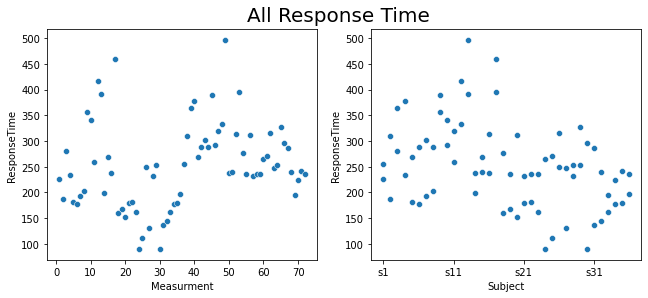

In [ ]:
# scatter plot all data points

fig, ax = plt.subplots(1, 2)
sns.scatterplot(ax = ax[0], data=data, x="Meas", y="ResponseTime")
ax[0].set_xlabel('Measurment')
sns.scatterplot(ax = ax[1], data=data, x="Subject", y="ResponseTime")
ax[1].set_xticks(np.arange(0, len(np.unique(data.Subject)), step=10))
fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
fig.suptitle('All Response Time', x = 0.8, fontsize = 20)
plt.show()

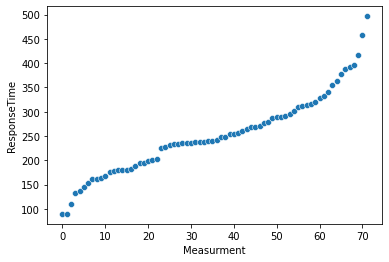

In [ ]:
# cumulative plot (sorted data)

data_sorted = data.sort_values('ResponseTime')
data.sort_values('ResponseTime')
sns.scatterplot(data=data_sorted, x = np.arange(0, len(np.unique(data.Meas))),y="ResponseTime")
plt.xlabel('Measurment')
plt.show()


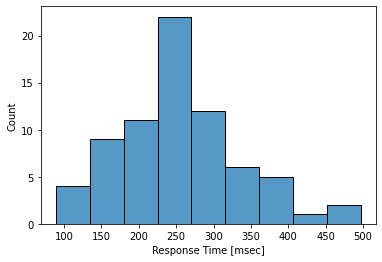

In [ ]:
# histogram

sns.histplot(data.ResponseTime)
plt.xlabel('Response Time [msec]')
plt.show()


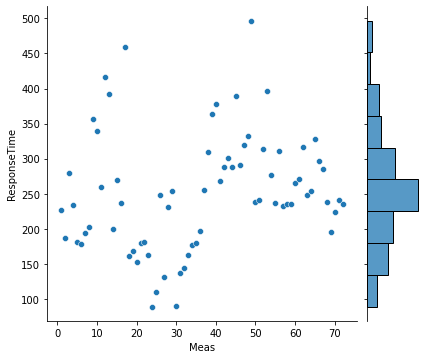

In [ ]:
# combination of plots

p=sns.jointplot(data=data, x = 'Meas', y = 'ResponseTime')
p.ax_marg_x.remove()
plt.show()


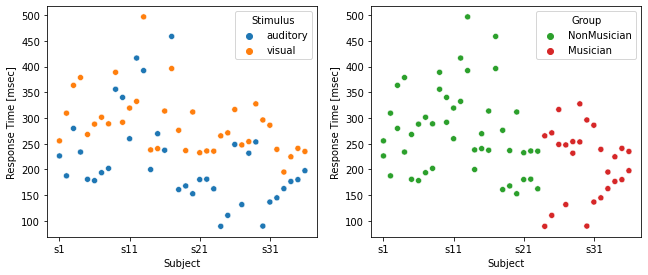

In [ ]:
# scatter by stimulus or by group

fig , ax = plt.subplots(1, 2)

sns.scatterplot(ax = ax[0], data=data, x="Subject", y="ResponseTime", hue = 'Stimulus')
sns.scatterplot(ax = ax[1], data=data, x="Subject", y="ResponseTime", hue = 'Group',palette=["C2", "C3"])

ax[0].set_xticks(np.arange(0, len(np.unique(data.Subject)), step=10))
ax[1].set_xticks(np.arange(0, len(np.unique(data.Subject)), step=10))
ax[0].set_ylabel('Response Time [msec]') 
ax[1].set_ylabel('Response Time [msec]') 

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()


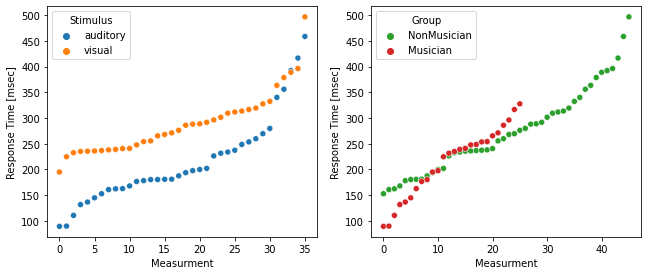

In [ ]:
# cumulative plot by stimulus or by group

time_auditory = np.sort(data.ResponseTime[data.Stimulus==np.unique(data.Stimulus)[0]])
time_visual = np.sort(data.ResponseTime[data.Stimulus==np.unique(data.Stimulus)[1]])
x_sort1 = np.concatenate((np.arange(0, len(np.unique(time_auditory))), np.arange(0, len(np.unique(time_visual)))) )
stim_sort = np.concatenate((time_auditory, time_visual) )
stim_sort_str = np.concatenate( (['auditory']*len(time_auditory), ['visual']*len(time_visual)) )

data_sort_stim = pd.DataFrame({'x': x_sort1,
                  'ResponseTime': stim_sort,
                  'Stimulus': stim_sort_str})

time_musician = np.sort(data.ResponseTime[data.Group==np.unique(data.Group)[0]])
time_nonmusician = np.sort(data.ResponseTime[data.Group==np.unique(data.Group)[1]])
x_sort2 = np.concatenate((np.arange(0, len(np.unique(time_nonmusician))), np.arange(0, len(np.unique(time_musician)))) )
group_sort = np.concatenate((time_nonmusician , time_musician ) )
group_sort_str = np.concatenate( (['NonMusician']*len(time_nonmusician), ['Musician']*len(time_musician)) )

data_sort_group = pd.DataFrame({'x': x_sort2,
                  'ResponseTime': group_sort,
                  'Group': group_sort_str})

fig , ax = plt.subplots(1, 2)

sns.scatterplot(ax=ax[0], data=data_sort_stim, x = 'x', y = 'ResponseTime', hue = 'Stimulus')
sns.scatterplot(ax=ax[1], data=data_sort_group, x = 'x', y = 'ResponseTime', hue = 'Group', palette = ['C2', 'C3'])

ax[0].set_xlabel('Measurment')
ax[0].set_ylabel('Response Time [msec]')
ax[1].set_xlabel('Measurment')
ax[1].set_ylabel('Response Time [msec]')

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()

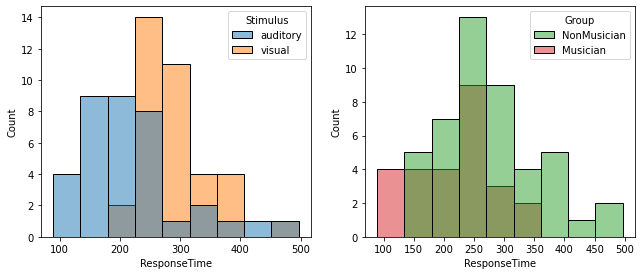

In [ ]:
# histogram by stimulus or group

fig , ax = plt.subplots(1, 2)

sns.histplot(ax=ax[0] , data=data, x = 'ResponseTime', hue = 'Stimulus')
sns.histplot(ax=ax[1] , data=data, x = 'ResponseTime', hue = 'Group', palette = ['C2', 'C3'])

fig.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
plt.show()


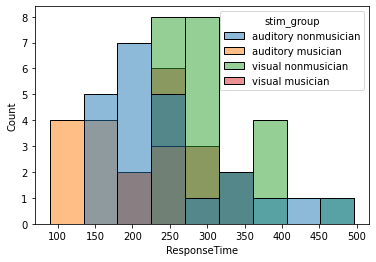

In [ ]:
# histogram of 4 groups

stim_group = ['auditory musician']*len(data.ResponseTime)
data['stim_group'] = stim_group
data.loc[(data.Stimulus==np.unique(data.Stimulus)[0]) & (data.Group==np.unique(data.Group)[1]), 'stim_group'] = 'auditory nonmusician'
data.loc[(data.Stimulus==np.unique(data.Stimulus)[1]) & (data.Group==np.unique(data.Group)[0]), 'stim_group'] = 'visual musician'
data.loc[(data.Stimulus==np.unique(data.Stimulus)[1]) & (data.Group==np.unique(data.Group)[1]), 'stim_group'] = 'visual nonmusician'

sns.histplot(data=data, x = 'ResponseTime', hue = 'stim_group')
plt.show()


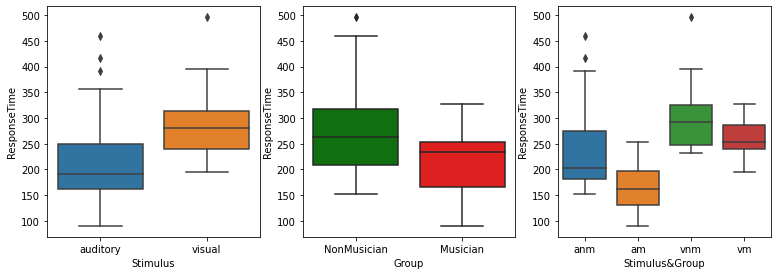

In [ ]:
# boxplot

fig, ax = plt.subplots(1,3)
sns.boxplot(ax=ax[0], data=data, x = 'Stimulus', y = 'ResponseTime')

sns.boxplot(ax=ax[1], data=data, x = 'Group', y = 'ResponseTime', palette = {'NonMusician':'g', 'Musician':'r'})

sns.boxplot(ax=ax[2], data=data, x = 'stim_group', y = 'ResponseTime')
ax[2].set_xticklabels(['anm' , 'am' , 'vnm' , 'vm'])
ax[2].set_xlabel('Stimulus&Group')

fig.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()

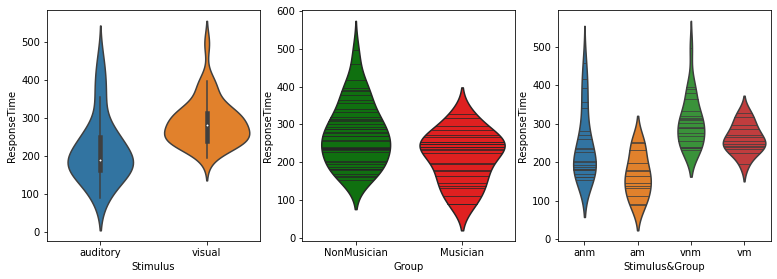

In [ ]:
# violinplot

fig, ax = plt.subplots(1,3)
sns.violinplot(ax=ax[0], data=data, x = 'Stimulus', y = 'ResponseTime')

sns.violinplot(ax=ax[1], data=data, x = 'Group', y = 'ResponseTime', inner = 'stick',
               palette = {'NonMusician':'g', 'Musician':'r'})

sns.violinplot(ax=ax[2], data=data, x = 'stim_group', y = 'ResponseTime', inner = 'stick')
ax[2].set_xticklabels(['anm' , 'am' , 'vnm' , 'vm'])
ax[2].set_xlabel('Stimulus&Group')

fig.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()


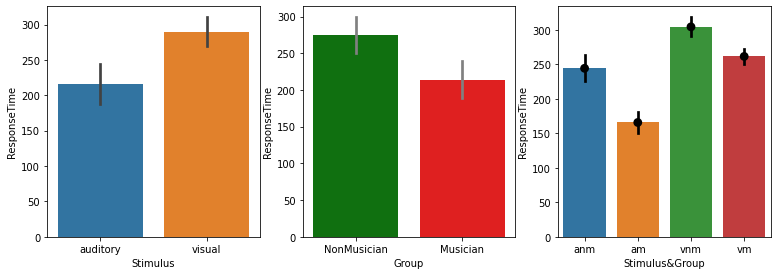

In [ ]:
# bar + error bar

fig, ax = plt.subplots(1,3)
sns.barplot(ax=ax[0], data=data, x = 'Stimulus', y = 'ResponseTime')

sns.barplot(ax=ax[1], data=data, x = 'Group', y = 'ResponseTime',
               palette = {'NonMusician':'g', 'Musician':'r'}, errcolor = '0.5')

sns.barplot(ax=ax[2], data=data, x = 'stim_group', y = 'ResponseTime', errorbar=None)
sns.pointplot(ax=ax[2], data=data, x = 'stim_group', y = 'ResponseTime', errorbar = "se", join=False, color = 'k')
ax[2].set_xticklabels(['anm' , 'am' , 'vnm' , 'vm'])
ax[2].set_xlabel('Stimulus&Group')

fig.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()


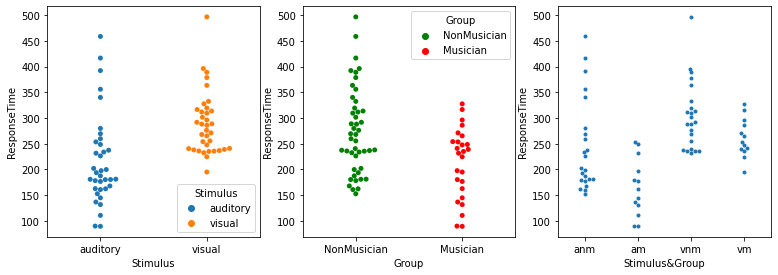

In [ ]:
# swarmplot (with loop instead of individual plots)

fig, ax = plt.subplots(1,3)
sns.swarmplot(ax=ax[0], data=data, x = 'Stimulus', y = 'ResponseTime', hue = 'Stimulus')

sns.swarmplot(ax=ax[1], data=data, x = 'Group', y = 'ResponseTime', hue = 'Group',
               palette = {'NonMusician':'g', 'Musician':'r'})

sns.swarmplot(ax=ax[2], data=data, x = 'stim_group', y = 'ResponseTime', size = 4)
ax[2].set_xticks(np.array(range(4)) , ['anm' , 'am' , 'vnm' , 'vm'])
ax[2].set_xlabel('Stimulus&Group')

fig.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()
